# Supervised and Unsupervised Learning Lab                                                                                           
#Spam Mail Detection Package                                                                    

                                                                                                                                                                   19pd10-Divya Sivaraman                                                                           19pd19-Krithika V



In [ ]:
import numpy as np
import pandas as pd
import nltk
import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import string
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import re
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from stopwords import get_stop_words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install wordcloud

In [ ]:
file=open("/content/drive/MyDrive/SUL lab/SUL_Package/spam_ham_dataset.csv")
df=pd.read_csv(file)
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.loc[:,"text"] = df.text.apply(lambda x : str.lower(x))

In [ ]:

df.loc[:,"text"] = df.text.apply(lambda x : " ".join(re.findall('[\w]+',x)))
df.loc[:,"text"] = df.text.apply(lambda x : re.sub(r'\d+','',x))

In [ ]:
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s

df.loc[:,"text"] = df.text.apply(lambda x: remove_stopWords(x))

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
df.loc[:,"text"] = df.text.apply(lambda x: stemSentence(x))

In [ ]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter follow note gave ...,0
1,2349,ham,subject hpl nom januari see attach file hplnol...,0
2,3624,ham,subject neon retreat ho ho ho around wonder ti...,0
3,4685,spam,subject photoshop window offic cheap main tren...,1
4,2030,ham,subject indian spring deal book teco pvr reven...,0
...,...,...,...,...
5166,1518,ham,subject put ft transport volum decreas contrac...,0
5167,404,ham,subject follow nom hpl take extra mmcf weekend...,0
5168,2933,ham,subject calpin daili ga nomin juli mention ear...,0
5169,1409,ham,subject industri worksheet august activ attach...,0


In [ ]:
x = df['text']
y = df['label']

In [ ]:
x.head()

0    subject enron methanol meter follow note gave ...
1    subject hpl nom januari see attach file hplnol...
2    subject neon retreat ho ho ho around wonder ti...
3    subject photoshop window offic cheap main tren...
4    subject indian spring deal book teco pvr reven...
Name: text, dtype: object

In [ ]:
y.head()

0     ham
1     ham
2     ham
3    spam
4     ham
Name: label, dtype: object

In [ ]:
#Vectorizing the text data for easy training and testing
from sklearn.feature_extraction.text import CountVectorizer
vectorization=CountVectorizer()
x_vec=vectorization.fit_transform(x)
x = pd.DataFrame(x_vec.toarray(), columns=vectorization.get_feature_names())
x

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aabda,aabvmmq,aac,aachecar,aaer,aafco,aaiab,aaigrcrb,aaihmqv,aaldano,aalland,aambiqu,aamlrg,aaoeuro,aar,aarhu,aaron,aashqcsni,aavil,aaxrzm,ab,aba,ababa,abacha,aback,abackof,abacu,abacustech,abandon,abarch,abas,abash,abat,abazi,abb,abba,abbasi,abbey,...,zv,zve,zvikydqu,zvjc,zvp,zvrkxjmex,zvx,zw,zwallet,zwdm,zwftnqlp,zwier,zwmdjvr,zwoegen,zwu,zxaghur,zxgwvpiadob,zxgwvpiher,zxgwvpiimg,zxgwvpimacromedia,zxgwvpimicrosoft,zxgwvpinorton,zxjcxz,zxklh,zxzmcnbf,zyban,zyjvit,zykf,zyl,zynsdirnh,zynv,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def listToString(s): 
    str1 = ""  
    for ele in s: 
        ele=str(ele)
        str1 += ele   
    return str1 
df.loc[:,"text"] = df.text.apply(lambda x: listToString(x))

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter follow note gave ...,0
1,2349,ham,subject hpl nom januari see attach file hplnol...,0
2,3624,ham,subject neon retreat ho ho ho around wonder ti...,0
3,4685,spam,subject photoshop window offic cheap main tren...,1
4,2030,ham,subject indian spring deal book teco pvr reven...,0


In [ ]:
#class 0
from sklearn.feature_extraction.text import CountVectorizer
docs0 = [row['text'] for index,row in df.iterrows() if row['label'] == 'ham' ]
vec0 = CountVectorizer()
x0 = vec0.fit_transform(docs0)
tdm0 = pd.DataFrame(x0.toarray(), columns=vec0.get_feature_names())
tdm0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aabda,aachecar,aaldano,aalland,aaron,aba,abackof,abacu,abacustech,abarch,abb,abbasi,abbott,abbpg,abbrevi,abc,abdul,abeckley,abel,abercrombi,abid,abil,abilen,abl,abnorm,aboard,abort,abortionist,abrahm,abramo,abraun,abroad,absenc,absens,absent,absolut,abund,aburrel,abus,...,zapata,zavisch,zdnetmail,zealand,zee,zeman,zephaniah,zernicek,zero,zevex,zgoner,zhang,zhiyong,zhiyun,zhou,zhu,zig,zigzag,zillion,zimmer,zimmerman,zinc,zinck,zine,zinn,zipper,zipter,zisman,zive,zivic,zivley,zlatica,zn,znl,znoj,zone,zufferli,zukin,zwier,zzn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#class 1
docs1 = [row['text'] for index,row in df.iterrows() if row['label'] == 'spam' ]
vec1 = CountVectorizer()
x1 = vec1.fit_transform(docs1)
tdm1 = pd.DataFrame(x1.toarray(), columns=vec1.get_feature_names())
tdm1.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aabvmmq,aac,aaer,aafco,aaiab,aaigrcrb,aaihmqv,aambiqu,aamlrg,aaoeuro,aar,aarhu,aaron,aashqcsni,aavil,aaxrzm,ab,aba,ababa,abacha,aback,abacu,abandon,abas,abash,abat,abazi,abb,abba,abbey,abbi,abbot,abbott,abc,abcdef,abcdzhongguo,abdomen,abdomin,...,zuybzbq,zuyjzb,zv,zve,zvikydqu,zvjc,zvp,zvrkxjmex,zvx,zw,zwallet,zwdm,zwftnqlp,zwmdjvr,zwoegen,zwu,zxaghur,zxgwvpiadob,zxgwvpiher,zxgwvpiimg,zxgwvpimacromedia,zxgwvpimicrosoft,zxgwvpinorton,zxjcxz,zxklh,zxzmcnbf,zyban,zyjvit,zykf,zyl,zynsdirnh,zynv,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzo,zzocb,zzso,zzsyt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
word_list0 = vec0.get_feature_names();  
# frequency dictionary with frequency of each word
count_list0 = x0.toarray().sum(axis=0) 
freq0 = dict(zip(word_list0,count_list0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
word_list1 = vec1.get_feature_names();    
count_list1 = x1.toarray().sum(axis=0) 
freq1 = dict(zip(word_list1,count_list1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
words = nltk.word_tokenize(" ".join(df.text.tolist()))

# EDA

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def wordcloud(words):
    
    wordcloud2 = WordCloud(
                              stopwords=STOPWORDS,
                              background_color='white',
                              width=1200,
                              height=1000
                             ).generate(" ".join(words))


    plt.imshow(wordcloud2)
    plt.axis('off')
    plt.show()

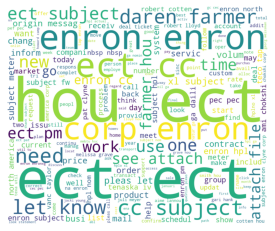

In [ ]:
wordcloud(words)

The word HOUCET is the most frequenty occuring word and words like INFORM, CHANGE occur less frequently

class HAM


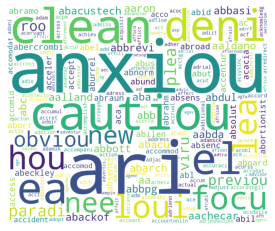

In [ ]:
print("class HAM")
wordcloud(word_list0)


The word ANXIOUS  is the most frequently occuring word. 

class SPAM


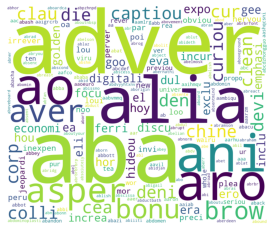

In [ ]:
print("class SPAM")
wordcloud(word_list1)


The most frequently occuring words are ADVER, ABA,ALIA.

# Train Test Split using K fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
LOO=StratifiedKFold(n_splits=20)
train_index=list()
test_index=list()
for train,test in LOO.split(x,y):
  test_index.append(test)
  train_index.append(train)

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
NB=list()
pred=list()
accur=list()
for train,test in zip(train_index,test_index):
  BNB=BernoulliNB()
  x_train,y_train=x.iloc[train],y.iloc[train]
  x_test,y_test=x.iloc[test],y.iloc[test]
  BNB.fit(x_train,y_train)
  NB.append(BNB)
  y_pred=BNB.predict(x_test)
  pred.append(y_pred)
  accur.append(accuracy_score(y_test,y_pred))

In [ ]:
accur

[0.8494208494208494,
 0.861003861003861,
 0.8108108108108109,
 0.8455598455598455,
 0.8764478764478765,
 0.8571428571428571,
 0.8223938223938224,
 0.8725868725868726,
 0.8648648648648649,
 0.806949806949807,
 0.9034749034749034,
 0.8604651162790697,
 0.8875968992248062,
 0.8527131782945736,
 0.8565891472868217,
 0.872093023255814,
 0.872093023255814,
 0.8488372093023255,
 0.8604651162790697,
 0.813953488372093]

In [ ]:
accuracy=0
for i in range(0,len(accur)):
  accuracy=accuracy+accur[i]
accuracy=accuracy/20
print("Accuracy : ",accuracy)

Accuracy :  0.8547731286103379


In [ ]:
print(classification_report(y.iloc[test_index[5]],pred[5]))

              precision    recall  f1-score   support

         ham       0.84      0.99      0.91       184
        spam       0.95      0.53      0.68        75

    accuracy                           0.86       259
   macro avg       0.90      0.76      0.80       259
weighted avg       0.87      0.86      0.84       259



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y.iloc[test_index[5]],pred[5])

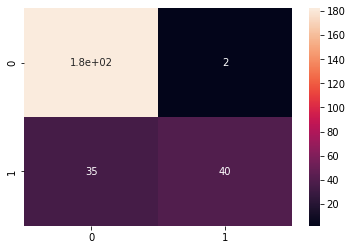

In [ ]:
sns.heatmap(cm,annot=True)




*   True positive=13.30%
*   False negative=2%


*   False positive=35%
*   True negatives=40%






# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
pred=list()
accur=list()
for train,test in zip(train_index,test_index):
  x_train,y_train=x.iloc[train],y.iloc[train]
  x_test,y_test=x.iloc[test],y.iloc[test]
  regression=LogisticRegression()
  regression.fit(x_train,y_train)
  y_pred=regression.predict(x_test)
  pred.append(y_pred)
  accur.append(accuracy_score(y_test,y_pred))

In [ ]:
accur

[0.9768339768339769,
 0.9806949806949807,
 0.9806949806949807,
 0.9884169884169884,
 0.9845559845559846,
 0.9768339768339769,
 0.9922779922779923,
 0.9884169884169884,
 0.9845559845559846,
 0.9884169884169884,
 0.9806949806949807,
 0.9961240310077519,
 0.9728682170542635,
 0.9689922480620154,
 0.9728682170542635,
 0.9728682170542635,
 0.9844961240310077,
 0.9767441860465116,
 0.9689922480620154,
 0.9806201550387597]

In [ ]:
accuracy=0
for i in range(0,len(accur)):
  accuracy=accuracy+accur[i]
accuracy=accuracy/20
print("Accuracy : ",accuracy)

Accuracy :  0.9808483732902337


Accuracy score=98.08%


In [ ]:
print(classification_report(y.iloc[test_index[5]],pred[5]))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       184
        spam       0.95      0.97      0.96        75

    accuracy                           0.98       259
   macro avg       0.97      0.98      0.97       259
weighted avg       0.98      0.98      0.98       259



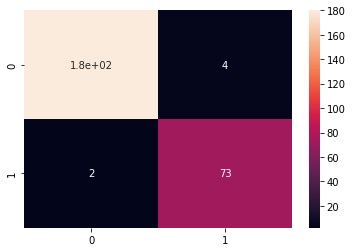

In [ ]:
cm=confusion_matrix(y.iloc[test_index[5]],pred[5])
sns.heatmap(cm,annot=True)




*   True positive=13.30%
*   False negative=4%


*   False positive=2%
*   True negatives=73%






# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
pred=list()
accur=list()
for train,test in zip(train_index,test_index):
  GNB=GaussianNB()
  x_train,y_train=x.iloc[train],y.iloc[train]
  x_test,y_test=x.iloc[test],y.iloc[test]
  GNB.fit(x_train,y_train)
  y_pred=GNB.predict(x_test)
  pred.append(y_pred)
  accur.append(accuracy_score(y_test,y_pred))

In [ ]:
accuracy=0
for i in range(0,len(accur)):
  accuracy=accuracy+accur[i]
accuracy=accuracy/20
print("Accuracy : ",accuracy)

Accuracy :  0.954164796025261


In [ ]:
print(classification_report(y.iloc[test_index[5]],pred[5]))

              precision    recall  f1-score   support

         ham       0.95      0.98      0.97       184
        spam       0.94      0.88      0.91        75

    accuracy                           0.95       259
   macro avg       0.95      0.93      0.94       259
weighted avg       0.95      0.95      0.95       259



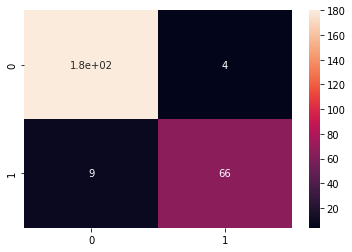

In [ ]:
cm=confusion_matrix(y.iloc[test_index[5]],pred[5])
sns.heatmap(cm,annot=True)




*   True positive=13.30%
*   False negative=4%


*   False positive=9%
*   True negatives=66%






# SVM

In [ ]:
from sklearn.svm import SVC,LinearSVC

pred=list()
accur=list()
for train,test in zip(train_index,test_index):
  svc=SVC()
  x_train,y_train=x.iloc[train],y.iloc[train]
  x_test,y_test=x.iloc[test],y.iloc[test]
  svc.fit(x_train,y_train)
  y_pred=svc.predict(x_test)
  pred.append(y_pred)
  accur.append(accuracy_score(y_test,y_pred))

In [ ]:
accuracy=0
for i in range(0,len(accur)):
  accuracy=accuracy+accur[i]
accuracy=accuracy/20
print("Accuracy : ",accuracy)

Accuracy :  0.9663479093711652


In [ ]:
print(classification_report(y.iloc[test_index[5]],pred[5]))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       184
        spam       0.96      0.99      0.97        75

    accuracy                           0.98       259
   macro avg       0.98      0.99      0.98       259
weighted avg       0.98      0.98      0.98       259



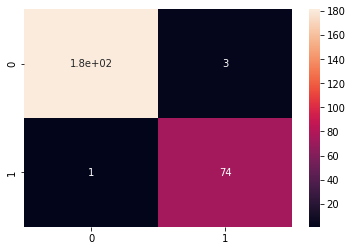

In [ ]:
cm=confusion_matrix(y.iloc[test_index[5]],pred[5])
sns.heatmap(cm,annot=True)




*   True positive=13.30%
*   Flase negative=3%


*   False positive=1%
*   True negatives=74%






# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pred=list()
accur=list()
for train,test in zip(train_index,test_index):
  knn = KNeighborsClassifier(n_neighbors=7)
  x_train,y_train=x.iloc[train],y.iloc[train]
  x_test,y_test=x.iloc[test],y.iloc[test]
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  pred.append(y_pred)
  accur.append(accuracy_score(y_test,y_pred))

In [ ]:
accuracy=0
for i in range(0,len(accur)):
  accuracy=accuracy+accur[i]
accuracy=accuracy/20
print("Accuracy : ",accuracy)

Accuracy :  0.8427673520696777


In [ ]:
print(classification_report(y.iloc[test_index[5]],pred[5]))

              precision    recall  f1-score   support

         ham       0.99      0.74      0.85       184
        spam       0.61      0.99      0.75        75

    accuracy                           0.81       259
   macro avg       0.80      0.86      0.80       259
weighted avg       0.88      0.81      0.82       259



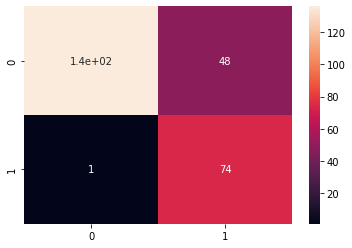

In [ ]:
cm=confusion_matrix(y.iloc[test_index[5]],pred[5])
sns.heatmap(cm,annot=True)




*   True positive=10.30%
*   Flase negative=48%


*   False positive=1%
*   True negatives=74%






# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pred=list()
accur=list()
for train,test in zip(train_index,test_index):
  dt=DecisionTreeClassifier()
  x_train,y_train=x.iloc[train],y.iloc[train]
  x_test,y_test=x.iloc[test],y.iloc[test]
  dt.fit(x_train,y_train)
  y_pred=dt.predict(x_test)
  pred.append(y_pred)
  accur.append(accuracy_score(y_test,y_pred))

In [ ]:
accuracy=0
for i in range(0,len(accur)):
  accuracy=accuracy+accur[i]
accuracy=accuracy/20
print("Accuracy : ",accuracy)

Accuracy :  0.9458464278231722


In [ ]:
print(classification_report(y.iloc[test_index[5]],pred[5]))

              precision    recall  f1-score   support

         ham       0.96      0.97      0.96       184
        spam       0.92      0.91      0.91        75

    accuracy                           0.95       259
   macro avg       0.94      0.94      0.94       259
weighted avg       0.95      0.95      0.95       259



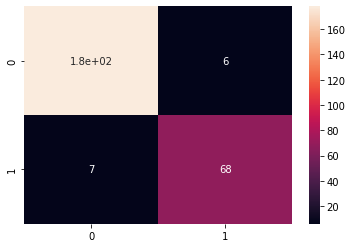

In [ ]:
cm=confusion_matrix(y.iloc[test_index[5]],pred[5])
sns.heatmap(cm,annot=True)




*   True positive=13.30%
*   Flase negative=6%


*   False positive=7%
*   True negatives=68%




